# **Data Visualisation Notebook**

## Objectives

* Solving Business Requirement 1: "Conducting a study to visually differentiate a healthy cherry leaf from one with powdery mildew."

## Inputs

* inputs/mildew_dataset/cherry-leaves/train
* inputs/mildew_dataset/cherry-leaves/validation
* inputs/mildew_dataset/cherry-leaves/test

## Outputs

* Image shape embeddings saved as pickle files
* Plots of image mean and variability per class label
* Plot to distinguish between healthy leaves and leaves infected with powdery mildew
* A randomly generated image montage of the class labels that can be used for the Streamlit dashboard



---

## Import Libraries

In [26]:
import os
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

## Set working directory

In [ ]:
current_dir = os.getcwd()
current_dir

'/Users/nathalievonheyl/Documents/ci-code_institute/PP5/pp5_mildew-detection/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/nathalievonheyl/Documents/ci-code_institute/PP5/pp5_mildew-detection'

## Set Input Directories

Set paths for train, validation and test set

In [15]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = os.path.join(my_data_dir, "train")
val_path = os.path.join(my_data_dir, "validation")
test_path = os.path.join(my_data_dir, "test")

## Set Output Directories

Check if file path `outputs/{version}` exists. If not: Create a new output directory with updated version number.

In [16]:
version = 'v1'
file_path = os.path.join("outputs", version)

if os.path.exists(file_path):
    print('Old version is already available create a new version.')
else:
    os.makedirs(file_path)

Old version is already available create a new version.


## Set Labels

In [17]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


---

## Visualisation of image data

### Image shape

Compute the size of the average image on the train set by measuring the height and width of every image in the dataset. Plot the results as a scatter plot chart. The scatter plot shows whether the images are consistently sized or have a wide variety of dimensions. The scatter plot chart it useful to spot outliers.

This step is completed as a preparation for standardizing input image sizes. Understanding the average dimensions helps choose an appropriate standard size to apply across all images in the dataset, ensuring they're unified in a way that won't distort most of them too much.

Knowing the average image size in this dataset also helps with resource planning, as image dimensions directly impact memory usage and processing requirements.

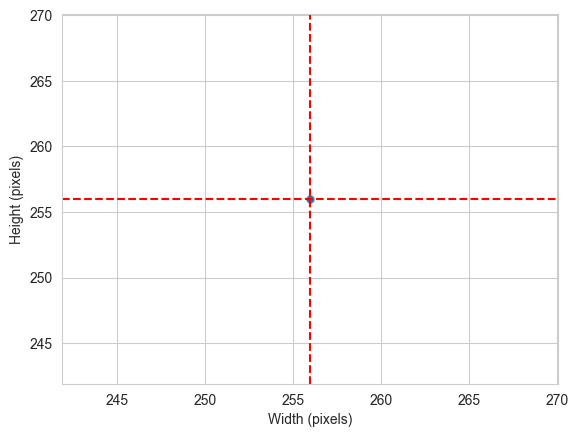

Width average: 256 
Height average: 256


In [21]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        img = imread(os.path.join(train_path, label, image_filename))
        d1, d2, colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

In [22]:
print(f"Width range: {min(dim2)} to {max(dim2)} pixels")
print(f"Height range: {min(dim1)} to {max(dim1)} pixels")
print(f"Unique widths: {sorted(set(dim2))}")
print(f"Unique heights: {sorted(set(dim1))}")

Width range: 256 to 256 pixels
Height range: 256 to 256 pixels
Unique widths: [256]
Unique heights: [256]


#### Save Image Size and Embeddings

In [28]:
image_shape = (256, 256, 3)
image_shape

(256, 256, 3)

In [29]:
joblib.dump(value=image_shape, filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

#### Conclusion Output 1: Save image shape embeddings

All images in the dataset already have the same dimensions (256 x 256 pixels). There are no outliers or variations in size. Therefor, no further processing is needed for standardization purposes.

Saving the Image shape configuration as a pickel file in a versionated folder is useful when further experimenting with image sizes to decide on the most efficient image size. With the help of versions, the model can also be trained with different dimensions if needed. Mainly however, saving configurations in version folders ensures consistency in case of further training the model at a later stage, ensuring the model is using images of the same size it has previously been trained with.

---

## Average and variability of images per label

Output 2: Define the mean and standard deviation of pixel values in healthy and infected leaf images. 

In order to create the plot to showcase this, the image data needs to be loaded into an array. In the following function the image shape is loaded along with the respective label in an array. 

**Parameters**: data path, size of images, number of images per label

This step prepares the image data for the training of the ml model.

A module is imported to load, resize, and convert the image files into numbers (num arrays). This is needed for the computer to be able to process the pictures.

How to find out what size to resize the images to? Use method `img.resize` and plot images to visually check whether downsizing them will affect feature recognition.

The images are converted into numbers, that the model is able to process.

### Resize images and load into numpy array

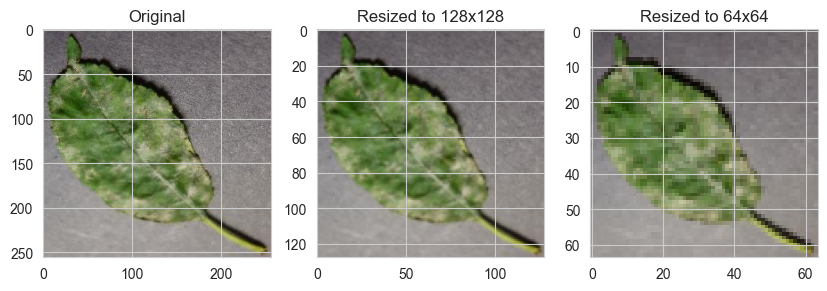

In [37]:
from tensorflow.keras.preprocessing import image

img_path = "inputs/mildew_dataset/cherry-leaves/test/powdery_mildew/1a64abff-82d4-45dc-b984-f1a5e6a5229e___FREC_Pwd.M 4952_flipLR.JPG"
img = image.load_img(img_path)

img_resized_128 = img.resize((128, 128))
img_resized_64 = img.resize((64, 64))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(img_resized_128)
plt.title("Resized to 128x128")

plt.subplot(1, 3, 3)
plt.imshow(img_resized_64)
plt.title("Resized to 64x64")

plt.show()

In [ ]:
def load_image_as_array(my_data_dir, new_size=(128, 128), n_images_per_label=20):
    """
    Function to convert images to numerical arrarys for model training
    Arguments are the path to image dataset folder, target image size and number of images per category
    
    Returns a tuple of x = numpy array of img data, y = numpy array of labels
    """
    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(os.path.join(my_data_dir, label)):
            if counter < n_images_per_label:
                img_path = os.path.join(my_data_dir, label, image_filename)
                img = image.load_img(img_path, target_size=new_size)
                
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y

Then, load images and labels into array

In [36]:
X, y = load_image_as_array(my_data_dir=train_path, new_size=image_shape, n_images_per_label=30)
print(X.shape, y.shape)

(60, 256, 256, 3) (60,)


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
